In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt


In [2]:

train_df = pd.read_csv('C:/Users/7kingdom/Downloads/DailyDelhiClimateTrain.csv')
test_df = pd.read_csv('C:/Users/7kingdom/Downloads/DailyDelhiClimateTest.csv')


In [3]:
train_df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [4]:
test_df

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [5]:
explain_columns = ["humidity", "wind_speed", "meanpressure"]
y_column = "meantemp"

In [6]:

X_train = train_df[explain_columns].values
y_train = train_df[y_column].values
X_test = test_df[explain_columns].values
y_test = test_df[y_column].values


In [7]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=1),  # pool_size를 1로 변경
    Flatten(),
    Dense(128, activation='relu'),  # 출력 차원을 늘림
    Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 32)             128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 1, 32)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

In [9]:
model.compile(loss='mse', optimizer='adam')

In [10]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [11]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, shuffle=False)


Epoch 1/50
37/37 [==============================] - 1s 12ms/step - loss: 645.6134 - val_loss: 846.4901
Epoch 2/50
37/37 [==============================] - 0s 5ms/step - loss: 573.1316 - val_loss: 688.6635
Epoch 3/50
37/37 [==============================] - 0s 4ms/step - loss: 374.1599 - val_loss: 359.2625
Epoch 4/50
37/37 [==============================] - 0s 4ms/step - loss: 145.5087 - val_loss: 113.5329
Epoch 5/50
37/37 [==============================] - 0s 5ms/step - loss: 82.7896 - val_loss: 77.8715
Epoch 6/50
37/37 [==============================] - 0s 4ms/step - loss: 80.3389 - val_loss: 77.8056
Epoch 7/50
37/37 [==============================] - 0s 4ms/step - loss: 78.4735 - val_loss: 76.2081
Epoch 8/50
37/37 [==============================] - 0s 4ms/step - loss: 76.7810 - val_loss: 74.2918
Epoch 9/50
37/37 [==============================] - 0s 4ms/step - loss: 75.2255 - val_loss: 72.5441
Epoch 10/50
37/37 [==============================] - 0s 4ms/step - loss: 73.7656 - val_loss

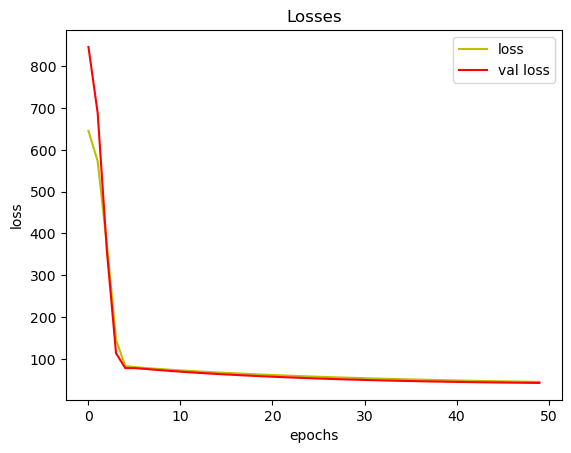

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x = np.arange(0, len(history.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [13]:
y_pred = model.predict(X_test)


4/4 [==============================] - 0s 3ms/step


In [14]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 45.03683098119612


In [15]:
from keras.layers import SimpleRNN

model = Sequential([
    SimpleRNN(32, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(128, activation='relu'),
    Dense(1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense_2 (Dense)             (None, 128)               4224      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 5441 (21.25 KB)
Trainable params: 5441 (21.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(loss='mse', optimizer='adam')

In [17]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, shuffle=False)

Epoch 1/50
37/37 [==============================] - 1s 9ms/step - loss: 638.7548 - val_loss: 815.1404
Epoch 2/50
37/37 [==============================] - 0s 4ms/step - loss: 443.8806 - val_loss: 262.6920
Epoch 3/50
37/37 [==============================] - 0s 4ms/step - loss: 108.4835 - val_loss: 92.9330
Epoch 4/50
37/37 [==============================] - 0s 4ms/step - loss: 98.6876 - val_loss: 88.3073
Epoch 5/50
37/37 [==============================] - 0s 4ms/step - loss: 93.6740 - val_loss: 85.5906
Epoch 6/50
37/37 [==============================] - 0s 4ms/step - loss: 90.4158 - val_loss: 81.3507
Epoch 7/50
37/37 [==============================] - 0s 4ms/step - loss: 87.4488 - val_loss: 78.2018
Epoch 8/50
37/37 [==============================] - 0s 4ms/step - loss: 84.6532 - val_loss: 75.2081
Epoch 9/50
37/37 [==============================] - 0s 4ms/step - loss: 82.1075 - val_loss: 72.3352
Epoch 10/50
37/37 [==============================] - 0s 4ms/step - loss: 79.6519 - val_loss: 69

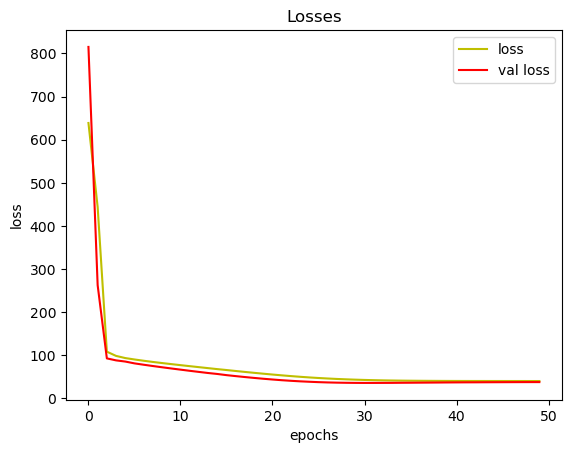

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x = np.arange(0, len(history.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [19]:
y_pred = model.predict(X_test)


4/4 [==============================] - 0s 3ms/step


In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 35.6278551856968
